PART 1

In [171]:
import pandas as pd
import numpy as np

In [172]:
aes=pd.read_csv("AES.csv")
aes.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,10.84,10.44,10.66,10.82,8512700.0,9.232483
1,2017-11-14,10.97,10.74,10.84,10.84,9935600.0,9.249549
2,2017-11-15,10.90,10.78,10.81,10.87,6803000.0,9.275147
3,2017-11-16,10.92,10.73,10.91,10.77,5917000.0,9.189818
4,2017-11-17,10.79,10.60,10.77,10.61,7575000.0,9.053296


In [173]:
aes.shape

(1259, 7)

In [174]:
cdns=pd.read_csv("CDNS.csv")
cdns.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,44.689999,43.830002,43.830002,44.669998,1644500,44.669998
1,2017-11-14,44.830002,44.360001,44.520000,44.770000,2674700,44.770000
2,2017-11-15,44.669998,44.009998,44.520000,44.320000,1728600,44.320000
3,2017-11-16,45.389999,44.419998,44.570000,44.860001,3005200,44.860001
4,2017-11-17,45.099998,44.410000,44.869999,44.580002,1813600,44.580002


In [175]:
cdns.shape

(1259, 7)

In [176]:
gww=pd.read_csv("GWW.csv")
gww.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,203.199997,194.210007,203.199997,195.789993,1298800.0,181.843704
1,2017-11-14,196.320007,191.389999,194.500000,195.580002,1028900.0,181.648666
2,2017-11-15,198.240005,193.500000,194.630005,195.729996,880400.0,181.787964
3,2017-11-16,200.610001,195.729996,195.919998,198.500000,581200.0,184.360672
4,2017-11-17,200.720001,196.779999,198.210007,197.820007,588500.0,183.729126


In [177]:
gww.shape

(1259, 7)

Part 1, 1.
Yes, there is no difference between columns Close and Adj Close column in case of company CDNS.

In [178]:
cdns.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

Part 1, 2.

In [179]:
print(f"Highest price of CDNS is", cdns["Adj Close"].max(), "and the lowest price is", cdns["Adj Close"].min())
print(f"Highest price of GWW is", gww["Adj Close"].max(), "and the lowest price is", gww["Adj Close"].min())
print(f"Highest price of AES is", aes["Adj Close"].max(), "and the lowest price is", aes["Adj Close"].min())

Highest price of CDNS is 193.08999633789065 and the lowest price is 35.849998474121094
Highest price of GWW is 608.3800048828125 and the lowest price is 181.64866638183597
Highest price of AES is 28.21999931335449 and the lowest price is 8.681197166442871


Part 1, 3.

In [180]:
print("Values for CDNS:\n",
np.log(cdns["Adj Close"]).agg([np.min, np.max, np.mean, np.median], axis=0))

print("Values for GWW:\n",
np.log(gww["Adj Close"]).agg([np.min, np.max, np.mean, np.median], axis=0))

print("Values for AES:\n",
np.log(aes["Adj Close"]).agg([np.min, np.max, np.mean, np.median], axis=0))

Values for CDNS:
 amin      3.579344
amax      5.263156
mean      4.463322
median    4.418841
Name: Adj Close, dtype: float64
Values for GWW:
 amin      5.202074
amax      6.410800
mean      5.839432
median    5.795869
Name: Adj Close, dtype: float64
Values for AES:
 amin      2.161159
amax      3.340031
mean      2.818596
median    2.816965
Name: Adj Close, dtype: float64


Part 1, 4.

In [181]:
import sklearn.metrics

In [182]:
aes.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [183]:
#sklearn.metrics.log_loss(aes["Open"], aes["Close"])

In [184]:
#aes.groupby.idxmax(axis=0, skipna=True, numeric_only=False)

Part 1, 5.
What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

In [185]:
aes.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [186]:
aes['Date']= pd.to_datetime(aes['Date'])
gww['Date']= pd.to_datetime(gww['Date'])
cdns['Date']= pd.to_datetime(cdns['Date'])

In [187]:
aes["Week"]=aes['Date'].dt.isocalendar().week
gww["Week"]=cdns['Date'].dt.isocalendar().week
cdns["Week"]=cdns['Date'].dt.isocalendar().week

In [188]:
print("Average weekly volume for AES is:", aes.groupby(["Week"]).Volume.mean().mean())
print("Average weekly volume for GWW is:", gww.groupby(["Week"]).Volume.mean().mean())
print("Average weekly volume for CDNS is:", cdns.groupby(["Week"]).Volume.mean().mean())

Average weekly volume for AES is: 5947133.0138712805
Average weekly volume for GWW is: 436097.95601568243
Average weekly volume for CDNS is: 1835453.9685463565


Part 1, 6.
Which company recorded the highest total return over the whole period?

Part 1, 7.
Plot the log-returns of the companies (ideally in the same plot)

In [189]:
aes["log_return"]=np.log(aes["Close"]/aes["Open"])
gww["log_return"]=np.log(gww["Close"]/gww["Open"])
cdns["log_return"]=np.log(cdns["Close"]/cdns["Open"])


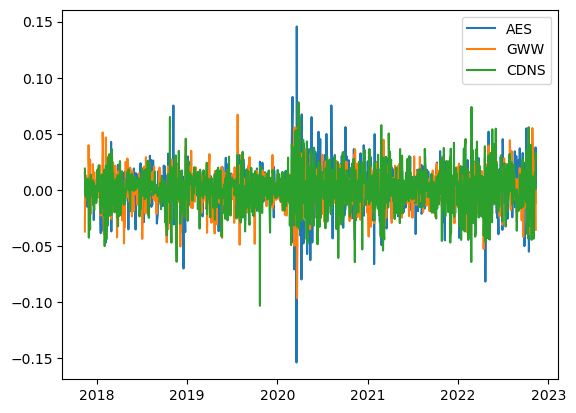

In [190]:
import matplotlib.pyplot as plt
plt.plot(aes["Date"], aes["log_return"], label = "AES")
plt.plot(gww["Date"], gww["log_return"], label = "GWW")
plt.plot(cdns["Date"], cdns["log_return"], label = "CDNS")
plt.legend()
plt.show()

Part 1, 8.
Show the log-return distribution of the companies (ideally in the same plot)

In [191]:
aes.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Week',
       'log_return'],
      dtype='object')

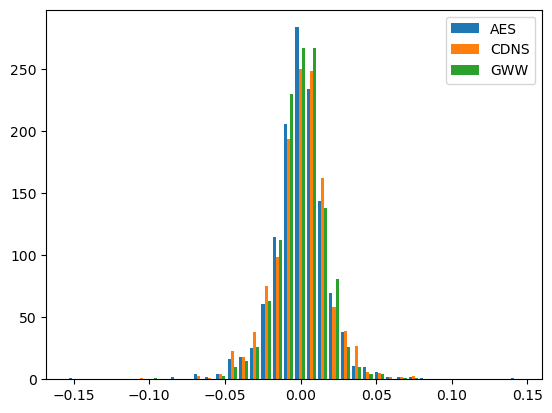

In [192]:
x=aes["log_return"]
y=cdns["log_return"]
z=gww["log_return"]
plt.hist([x, y, z], 40, label=['AES', 'CDNS', "GWW"])
plt.legend(loc='upper right')
plt.show()

Part 2

1. Find out how many companies do not filled-in the date of inclusion (column “included”) to S&P 500.
2. Delete the companies with no inclusion date and calculate which company is the oldest/youngest constituent and tell us the average age of a constituent in the sample. If you need to fix anything or make any assumptions, comment on them in the code.
Hint: pd.to_datetime (some date column, dayfirst=True,errors='coerce')
3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like this)
4. Parse the “hq” column, extract the state of the hq and describe the distribution of the
states
5. Join the dataset with this one: https://ies-python-midterm.s3.eu-central-
1.amazonaws.com/companies/companies_subindustry.csv
And join the two datasets based on an appropriate key. Report on distribution of subindustries for the “Consumer Discretionary” GICS sector.

In [193]:
dta=pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
dta.head()

,Symbol,Security,GICS Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


Part 2, 1.

In [194]:
print(dta["included"].isnull().sum(), " companies have not filled in the date of inclusion")

45  companies have not filled in the date of inclusion


Part 2, 2.

In [199]:
dta_clean=dta[~dta["included"].isnull()]

In [206]:
print("Oldest constituent: ", dta_clean["Security"][dta_clean["included"]==dta_clean["included"].min()])
print("Youngest constituent: ", dta_clean["Security"][dta_clean["included"]==dta_clean["included"].max()])

Oldest constituent:  163    Eastman Chemical Company
Name: Security, dtype: object
Youngest constituent:  3    AbbVie
Name: Security, dtype: object


Part 2, 3. Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like this)

In [218]:
dta_clean.columns


Index(['Symbol', 'Security', 'GICS Sector', 'hq', 'included', 'Founded'], dtype='object')

In [219]:
dta_clean.dtypes

Symbol         object
Security       object
GICS Sector    object
hq             object
included       object
Founded        object
dtype: object

In [220]:
dta_clean.groupby(['GICS Sector'])

KeyError: 'GICS Sector'